In [1]:
from cobaya.model import get_model
import cl_like as cll
import numpy as np
import sacc
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

# From Matteo's paper: https://arxiv.org/pdf/2110.05408.pdf
# The factor 2 comes to match the definition used in cl_like
def get_b2(b1):
    return 2 * (0.01677*b1**3 - 0.005116*b1**2 + 0.4279*b1 - 0.1635)

def get_bs2(b1):
    return 2 * (-0.3605*b1**3 + 0.5649*b1**2 - 0.1412*b1 - 0.01318)

def get_bk2(b1):
    return 0.2298*b1**3 - 2.096*b1**2 + 0.7816*b1 - 0.1545

2024-07-26 16:24:17.513997: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def get_info(bias_gc0_b1=0, bias_gc1_b1=0, bias_gc2_b1=0, bias_gc3_b1=0):
    data = "/mnt/extraspace/gravityls_3/sacc_files/cls_FD_covG_dzMarg_mMarg.fits"
    info = {"params": {"A_sE9": 2.23,
                       "Omega_c": 0.25,
                       "Omega_b": 0.05,
                       "h": 0.67,
                       "n_s": 0.96,
                       "m_nu": 0.0,

                       "bias_DECALS__0_b1":  bias_gc0_b1,
                       # "bias_DECALS__0_b1p": 0.0,
                       "bias_DECALS__0_b2":  get_b2(bias_gc0_b1),
                       "bias_DECALS__0_bs":  get_bs2(bias_gc0_b1),
                       "bias_DECALS__0_bk2": get_bk2(bias_gc0_b1),
                       
                       "bias_DECALS__1_b1":  bias_gc1_b1,
                       # "bias_DECALS__1_b1p": 0.0,
                       "bias_DECALS__1_b2":  get_b2(bias_gc1_b1),
                       "bias_DECALS__1_bs":  get_bs2(bias_gc1_b1),
                       "bias_DECALS__1_bk2": get_bk2(bias_gc1_b1),
                       
                       "bias_DECALS__2_b1":  bias_gc2_b1,
                       # "bias_DECALS__1_b1p": 0.0,
                       "bias_DECALS__2_b2":  get_b2(bias_gc2_b1),
                       "bias_DECALS__2_bs":  get_bs2(bias_gc2_b1),
                       "bias_DECALS__2_bk2": get_bk2(bias_gc2_b1),
                       
                       "bias_DECALS__3_b1":  bias_gc3_b1,
                       # "bias_DECALS__1_b1p": 0.0,
                       "bias_DECALS__3_b2":  get_b2(bias_gc3_b1),
                       "bias_DECALS__3_bs":  get_bs2(bias_gc3_b1),
                       "bias_DECALS__3_bk2": get_bk2(bias_gc3_b1),

                       "bias_KiDS1000__0_m": 0,
                       "limber_KiDS1000__0_dz": 0,
                       "bias_KiDS1000__1_m": 0,
                       "limber_KiDS1000__1_dz": 0,
                       "bias_KiDS1000__2_m": 0,
                       "limber_KiDS1000__2_dz": 0,
                       "bias_KiDS1000__3_m": 0,
                       "limber_KiDS1000__3_dz": 0,
                       "bias_KiDS1000__4_m": 0,
                       "limber_KiDS1000__4_dz": 0,
                       
                       "sigma8": None},
            "theory": {"ccl": {"external": cll.CCL,
                               "transfer_function": "boltzmann_camb",
                               "matter_pk": "halofit",
                               "baryons_pk": "nobaryons"},
                       "limber": {"external": cll.Limber,
                                  "nz_model": "NzShift",
                                  "input_params_prefix": "limber",
                                  "ia_model": "IANone"},
                       "Pk": {"external": cll.Pk,
                             "bias_model": 'BaccoPT',
                              "zmax_pks": 1.5},  # For baccoemu
                       "clfinal": {"external": cll.ClFinal,
                                   "input_params_prefix": "bias",
                                   "shape_model": "ShapeMultiplicative"}
                       },
            "likelihood": {"ClLike": {"external": cll.ClLike,
                                      "input_file": data,
                                      "bins": [{"name": "DECALS__0"},
                                               {"name": "DECALS__1"},
                                               {"name": "DECALS__2"},
                                               {"name": "DECALS__3"},
                                               {"name": "KiDS1000__0"},
                                               {"name": "KiDS1000__1"},
                                               {"name": "KiDS1000__2"},
                                               {"name": "KiDS1000__3"},
                                               {"name": "KiDS1000__4"},                                               
                                               {"name": "PLAcv"}],
                                      "twopoints": [{"bins": ["DECALS__0", "DECALS__0"]},
                                                    {"bins": ["DECALS__1", "DECALS__1"]},
                                                    {"bins": ["DECALS__2", "DECALS__2"]},
                                                    {"bins": ["DECALS__3", "DECALS__3"]},

                                                    {"bins": ["DECALS__0", "KiDS1000__0"]},
                                                    {"bins": ["DECALS__0", "KiDS1000__1"]},
                                                    {"bins": ["DECALS__0", "KiDS1000__2"]},
                                                    {"bins": ["DECALS__0", "KiDS1000__3"]},
                                                    {"bins": ["DECALS__0", "KiDS1000__4"]},
                                                    {"bins": ["DECALS__0", "KiDS1000__0"]},
                                                    {"bins": ["DECALS__1", "KiDS1000__1"]},
                                                    {"bins": ["DECALS__1", "KiDS1000__2"]},
                                                    {"bins": ["DECALS__1", "KiDS1000__3"]},
                                                    {"bins": ["DECALS__1", "KiDS1000__4"]},
                                                    {"bins": ["DECALS__2", "KiDS1000__0"]},
                                                    {"bins": ["DECALS__2", "KiDS1000__1"]},
                                                    {"bins": ["DECALS__2", "KiDS1000__2"]},
                                                    {"bins": ["DECALS__2", "KiDS1000__3"]},
                                                    {"bins": ["DECALS__2", "KiDS1000__4"]},
                                                    {"bins": ["DECALS__3", "KiDS1000__0"]},
                                                    {"bins": ["DECALS__3", "KiDS1000__1"]},
                                                    {"bins": ["DECALS__3", "KiDS1000__2"]},
                                                    {"bins": ["DECALS__3", "KiDS1000__3"]},
                                                    {"bins": ["DECALS__3", "KiDS1000__4"]},
                                                    
                                                    {"bins": ["DECALS__0", "PLAcv"]},
                                                    {"bins": ["DECALS__1", "PLAcv"]},
                                                    {"bins": ["DECALS__2", "PLAcv"]},
                                                    {"bins": ["DECALS__3", "PLAcv"]},
                                                    ],
                                      "defaults": {
                                                   "kmax": 1e10,
                                                   "lmin": 0,
                                                   "lmax": 1e30,
                                                   },
                                      }
                           },
            "output": "dum",
            "debug": False}

    return info

[model] *WARNING* Ignored blocks/options: ['output']
Loading l-bias lpt emulator...


2023-08-01 16:43:30.197395: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...
Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/mnt/zfsusers/gravityls_3/miniconda3/envs/baryons2/lib/python3.9/site-packages/pyccl/tracers.py:110: CCLWarning: The number of samples in the n(z) (120) is smaller than the number of samples in the lensing kernel (256). Consider disabling spline integration for the lensing kernel by setting pyccl.gsl_params.LENSING_KERNEL_SPLINE_INTEGRATION = False
  warnings.warn(
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration fail

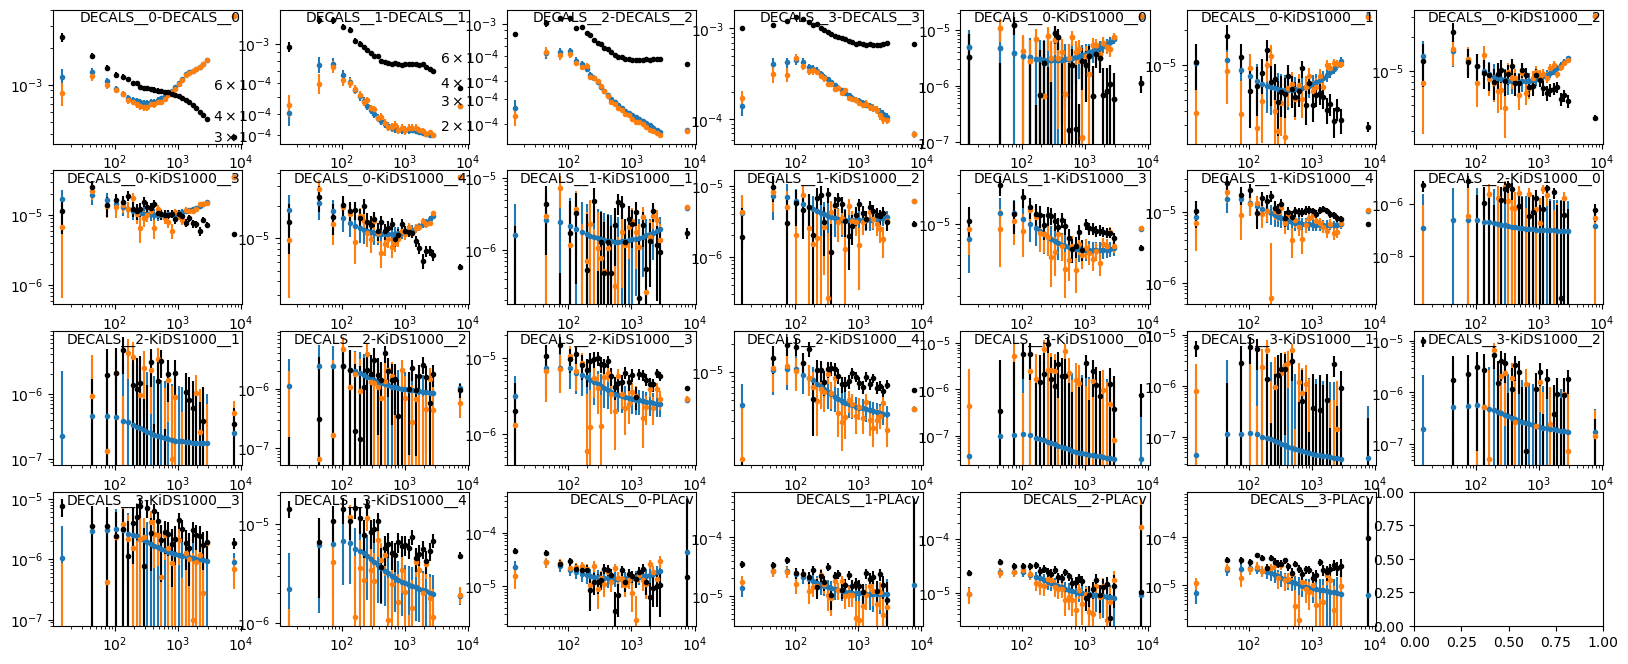

In [3]:
info = get_info()

model = get_model(info)
loglikes, derived = model.loglikes()
lkl = model.likelihood['ClLike']

s = lkl.get_cl_theory_sacc()
sd = lkl.get_cl_data_sacc()
cov = sd.covariance.covmat
s.add_covariance(cov)
s.save_fits('./mock_data_nobias.fits', overwrite=True)

snoisy = s.copy()
snoisy.mean = multivariate_normal.rvs(s.mean, cov=s.covariance.covmat, random_state=1)
snoisy.save_fits('./mock_data_nobias_noisy.fits', overwrite=True)

f, ax = plt.subplots(4, 7, figsize=(20, 8))
ax = ax.reshape(-1)

for i, trs in enumerate(s.get_tracer_combinations()):
    if 'KiDS' in ''.join(trs):
        dtype = 'cl_0e'
    else:
        dtype = 'cl_00'
    ell, cl, cov = s.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', label='noiseless')
    
    ell, cl, cov = snoisy.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', label='noisy')
    
    ell, cl, cov = sd.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', c='k', label='real data')
    
    ax[i].loglog()
    ax[i].text(0.99, 0.99, f"{trs[0]}-{trs[1]}", horizontalalignment='right',
     verticalalignment='top', transform=ax[i].transAxes, fontsize=10)
plt.show()
plt.close()

[model] *WARNING* Ignored blocks/options: ['output']
Loading l-bias lpt emulator...
L-bias lpt emulator loaded in memory.
Loading smeared bao emulator...
Smeared bao emulator loaded in memory.
Loading non-linear l-bias emulator...
Nonlinear l-bias emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading sigma8 emulator...
Sigma8 emulator loaded in memory.
Loading linear emulator...
Linear emulator loaded in memory.
Loading no-wiggles emulator...
No-wiggles emulator loaded in memory.
Loading non-linear emulator...
Nonlinear emulator loaded in memory.
Loading Baryonic Emulator...
Baryonic Emulator loaded in memory.


/mnt/zfsusers/gravityls_3/mambaforge/envs/coevolution/lib/python3.9/site-packages/pyccl/tracers.py:110: CCLWarning: The number of samples in the n(z) (120) is smaller than the number of samples in the lensing kernel (256). Consider disabling spline integration for the lensing kernel by setting pyccl.gsl_params.LENSING_KERNEL_SPLINE_INTEGRATION = False
  warnings.warn(
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration failure, attempting backup method.: GSL ERROR: roundoff error
WARNING 18: ccl_cls.c: integ_cls_limber_qag_quad(): Default GSL integration f

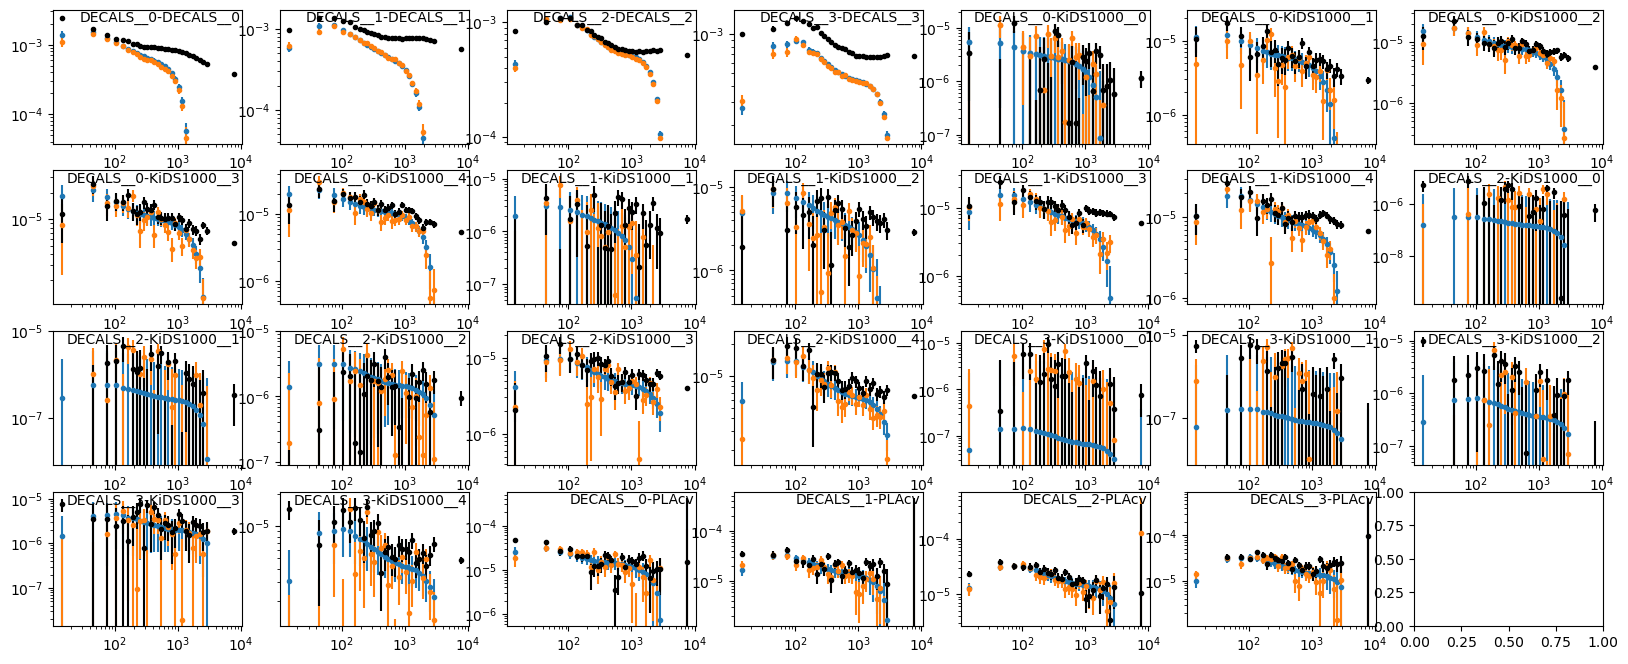

In [3]:
info = get_info(0.1, 0.2, 0.3, 0.4)

model = get_model(info)
loglikes, derived = model.loglikes()
lkl = model.likelihood['ClLike']

s = lkl.get_cl_theory_sacc()
sd = lkl.get_cl_data_sacc()
cov = sd.covariance.covmat
s.add_covariance(cov)
s.save_fits('./mock_data_bias.fits', overwrite=True)

snoisy = s.copy()
snoisy.mean = multivariate_normal.rvs(s.mean, cov=s.covariance.covmat, random_state=1)
snoisy.save_fits('./mock_data_bias_noisy.fits', overwrite=True)

f, ax = plt.subplots(4, 7, figsize=(20, 8))
ax = ax.reshape(-1)

for i, trs in enumerate(s.get_tracer_combinations()):
    if 'KiDS' in ''.join(trs):
        dtype = 'cl_0e'
    else:
        dtype = 'cl_00'
    ell, cl, cov = s.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', label='noiseless')
    
    ell, cl, cov = snoisy.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', label='noisy')
    
    ell, cl, cov = sd.get_ell_cl(dtype, *trs, return_cov=True)
    err = np.sqrt(np.diag(cov))
    ax[i].errorbar(ell, ell*cl, yerr=ell*err, fmt='.', c='k', label='real data')
    
    ax[i].loglog()
    ax[i].text(0.99, 0.99, f"{trs[0]}-{trs[1]}", horizontalalignment='right',
     verticalalignment='top', transform=ax[i].transAxes, fontsize=10)
plt.show()
plt.close()